In [1]:
import json
#importing the opencv module  
import cv2  
import numpy as np
import tensorflow as tf
import keras
import os
from keras.preprocessing import sequence
import matplotlib.pyplot as plt 
import random
import pandas as pd

Get and save data from JSON files

In [2]:
dirname = 'C:/Users/bodna/OneDrive/Dokumentumok/2021-22_1.felev/data mining_dbm2/data'
files = os.listdir(dirname)
files[0]

'participant_--.json'

In [3]:
data  = []
with os.scandir(dirname) as dirs:
        for entry in dirs:
            p = dirname 
            p += '/'
            p += entry.name
            
            with open(p, "r") as rf:
                decoded_data = json.load(rf)
                data.append(decoded_data)

Get correct feature names

In [4]:
data[0].keys()
key_list = list(data[0].keys())
key_list[12:]

columns = []
for i in range(len(key_list)):
    if (key_list[i] == "participant-skills"):
            continue
    else:
        columns.append(key_list[i][12:])
columns

['likes',
 'projects',
 'url',
 'name',
 'followers',
 'location',
 'bio',
 'id',
 'linkedin',
 'website',
 'github',
 'hackathons',
 'following',
 'number-of-skills',
 'twitter']

Check in each JSON object, that the skills are unique

In [5]:
def all_unique(item):
    return len(set(item)) == len(item)

trues = 0
falses = 0
for i in range(len(data)):
    skills = []
    for j in range(len(data[i]['participant-skills'])):
        skills.append(data[i]['participant-skills'][0]['name'])
    if len(skills) != 0 and len(skills) != 1:
        if all_unique(skills) == True:
            trues = trues + 1
        else:
            falses = falses + 1
print(falses, trues)

111 0


Data preparation: change value of lacation feature

In [6]:
rows = []
for i in range(len(data)):
    key_list = list(data[i].keys())
    row = []
    for j in range(len(key_list)):
        if(key_list[j] == "participant-location"):
            locations = data[i]["participant-location"].split(',')
        
            if len(locations[0]) > 20:
                row.append("nofollow")
            else:
                row.append(locations[0])
        elif (key_list[j] == "participant-skills"):
            continue
        elif (key_list[j] == "participant-url"):
            row.append(data[i][key_list[j]][20:])
        else: 
            row.append(data[i][key_list[j]])
    rows.append(row)
rows[0]

['1',
 '2',
 '--',
 'Mark Mileyev',
 '2',
 'Santa Cruz',
 '',
 '--',
 '',
 '',
 '',
 '2',
 '1',
 '2',
 '']

In [64]:
df = pd.DataFrame(rows, columns = columns)

df['likes'] = df['likes'].astype(int)
df['projects'] = df['projects'].astype(int)
df['followers'] = df['followers'].astype(int)
df['hackathons'] = df['hackathons'].astype(int)
df['following'] = df['following'].astype(int)
df['number-of-skills'] = df['number-of-skills'].astype(int)
df

#check missing values 
df.isna().sum()
df.isnull().sum()

likes               0
projects            0
url                 0
name                0
followers           0
location            0
bio                 0
id                  0
linkedin            0
website             0
github              0
hackathons          0
following           0
number-of-skills    0
twitter             0
dtype: int64

<AxesSubplot:>

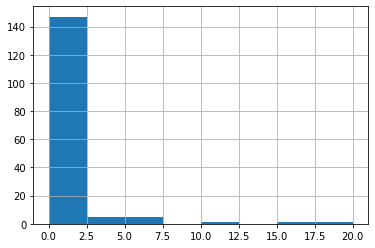

In [8]:
df['likes'].value_counts()
df['likes'].hist(bins=8)

In [9]:
df['hackathons'].value_counts()
bins = pd.cut(df['hackathons'],4)
bins.value_counts(sort=False)

(-0.018, 4.5]    148
(4.5, 9.0]         7
(9.0, 13.5]        2
(13.5, 18.0]       3
Name: hackathons, dtype: int64

In [10]:
df.describe(include='all')

,likes,projects,url,name,followers,location,bio,id,linkedin,website,github,hackathons,following,number-of-skills,twitter
count,160.000000,160.000000,160,160,160.000000,160,160,160,160,160,160,160.000000,160.000000,160.000000,160
unique,NaN,NaN,159,159,NaN,89,25,159,27,90,85,NaN,NaN,NaN,27
top,NaN,NaN,0will0,will Martinez,NaN,nofollow,,0will0,,,,NaN,NaN,NaN,
freq,NaN,NaN,2,2,NaN,25,136,2,134,70,75,NaN,NaN,NaN,134
mean,0.875000,1.862500,NaN,NaN,1.312500,NaN,NaN,NaN,NaN,NaN,NaN,1.987500,0.850000,4.756250,NaN
std,2.343867,1.861519,NaN,NaN,2.754499,NaN,NaN,NaN,NaN,NaN,NaN,2.542686,2.226767,4.327398,NaN
min,0.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,0.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000,NaN
50%,0.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,4.000000,NaN
75%,1.000000,2.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,7.250000,NaN


Get information of dataset

In [11]:
print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))

Number of instances = 160
Number of attributes = 15


In the dataset there is one duplicated rows, wihch means each row in the dataset is unique/different from each other. 

In [12]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

index = np.where(dups == True)
df.iloc[index[0][0]]

Number of duplicate rows = 1


likes                                       0
projects                                    1
url                                    0will0
name                            will Martinez
followers                                   0
location                             nofollow
bio                                          
id                                     0will0
linkedin                                     
website             https://github.com/0will0
github              https://github.com/0will0
hackathons                                  1
following                                   0
number-of-skills                            6
twitter                                      
Name: 44, dtype: object

<AxesSubplot:>

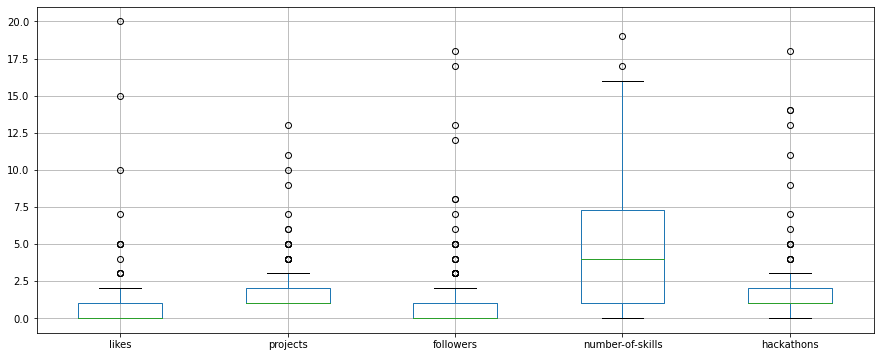

In [13]:
data = df[['likes', 'projects', 'followers','number-of-skills', 'hackathons']]
data.boxplot(figsize=(15,6))

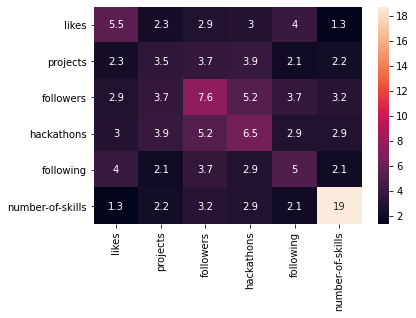

In [15]:
import seaborn as sns
plt.figsize=(15,6)
cov = df.cov()

sns.heatmap(cov, annot=True) #, fmt='g') #, xticklabels=labs, yticklabels=labs)
plt.show()

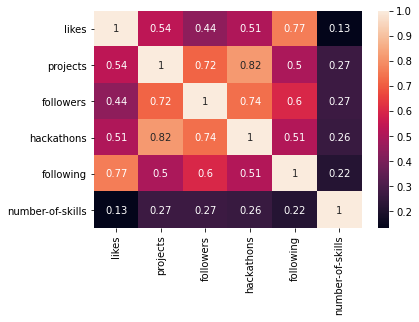

In [80]:
import seaborn as sns
corr = df.corr()

sns.heatmap(corr, annot=True) #, fmt='g') #, xticklabels=labs, yticklabels=labs)
plt.show()

Leave features which are not important or relevant to the independent variable

In [68]:
df = df.drop(['linkedin', 'website', 'id', 'github','twitter', 'name', 'url', 'bio'], axis=1)
df

,likes,projects,followers,location,hackathons,following,number-of-skills,isWinner
0,15,5,5,nofollow,4,14,13,1
1,0,1,0,USA,1,0,6,1
2,0,2,0,USA,0,0,5,1
3,5,3,6,USA,5,7,5,1
4,0,1,2,Mexiko,2,0,10,1
...,...,...,...,...,...,...,...,...
155,0,3,2,USA,3,0,2,0
156,0,2,3,USA,2,0,4,0
157,1,1,1,Mexiko,1,0,3,0
158,0,1,0,nofollow,1,0,0,0


In [65]:
#if the participant has 5 or more skills, he/she will be the winner
winners = df.loc[df['number-of-skills']>=5].copy()
winners['isWinner'] = 1 

#if the participant has less then 5 skills, he/she won't win
non-winners = df.loc[df['number-of-skills']<5].copy()
non-winners['isWinner'] = 0

data = winners.append(non-winners)
data = data.reset_index(drop=True)
df = data
df.location.unique()

#Use bigger areas instead of cities
usa = ['Boston', 'San Francisco', 'Washington','St. Louis','San Diego', 'Los Angeles', 'Troy', 'Phoenix', 'Oklahoma City', 'San Antonio', 'Seattle',
        'Pittsburgh', 'Amherst','Houston', 'Fairfax', 'Webster', 'New York','Orlando','Claremont', 'Austin', 'Philadelphia', 'California','Fullerton', 'United States','Richmond', 'Chicago', 'Minneapolis', 'Nashville']

uk = ['London', 'Edinburgh', 'Manchester', 'Cambridge', 'west Chester', 'Rochester', 'Kingston']

europe = ['Germany', 'Karlsruhe','Warsaw', 'Stockholm', 'Munich', 'Tallinn', 'Moscow', 'Latvia','Linz', 'Budapest', 'Waterloo', 'Berlin', 'Hanover']

canada = ['Ottawa', 'Toronto', 'Montreal']

places = []
for i in range(len(df.location)):
    #print(df.location[i])
    if df.location[i] in usa:
        places.append('USA')
    elif df.location[i] in uk:
        places.append('UK')
    elif df.location[i] in europe:
        places.append('EU')
    elif df.location[i] in canada:
        places.append('Canada')
    elif df.location[i] == "nofollow":
        places.append('nofollow')
    else:
        places.append('Mexiko')
        
df['location'] = places
df.location.unique()

array(['nofollow', 'USA', 'Mexiko', 'EU', 'Canada', 'UK'], dtype=object)

In [85]:
y = pd.get_dummies(df.location, prefix='location')
y
df.insert(loc=1, column='location_nofollow', value=y['location_nofollow'])
df.insert(loc=2, column='location_EU', value=y['location_EU'])
df.insert(loc=3, column='location_Mexiko', value=y['location_Mexiko'])
df.insert(loc=4, column='location_UK', value=y['location_UK'])
df.insert(loc=5, column='location_USA', value=y['location_USA'])
df = df.drop(['location'], axis=1)

Get dependent and independent variables

In [97]:
Y = df['isWinner']
X = df.drop(['isWinner'], axis=1)

In [140]:
# Sklearn regression model evaluation functions
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from math import sqrt
from sklearn.metrics import r2_score
import statistics

def modelEffectivenessCheck(model):
    sum = 0
    k = 0
    classifier = model
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    print("Effectiveness of the Random Forest Classifier")
    print("MAE", mean_absolute_error(Y_test, y_pred))
    print("RMSE", sqrt(mean_squared_error(Y_test, y_pred)))
    print("R2", r2_score(Y_test, y_pred))
    return y_pred, Y_test

Split data into train and test set

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score

Standardize train and test set

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Working with GridSearch to find hyperparameters for RandomForest

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
classification = RandomForestClassifier()
parameters = {
    "max_depth":[2, 4, 7, 8, 9, 10],
    "n_estimators":[3, 5, 10, 15],
    "random_state": [15, 30]
}

cv = GridSearchCV(classification, parameters, cv=3, verbose=3)
cv.fit(X_train,Y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] max_depth=2, n_estimators=3, random_state=15 ....................
[CV]  max_depth=2, n_estimators=3, random_state=15, score=0.545, total=   0.0s
[CV] max_depth=2, n_estimators=3, random_state=15 ....................
[CV]  max_depth=2, n_estimators=3, random_state=15, score=0.273, total=   0.0s
[CV] max_depth=2, n_estimators=3, random_state=15 ....................
[CV]  max_depth=2, n_estimators=3, random_state=15, score=0.500, total=   0.0s
[CV] max_depth=2, n_estimators=3, random_state=30 ....................
[CV]  max_depth=2, n_estimators=3, random_state=30, score=0.455, total=   0.0s
[CV] max_depth=2, n_estimators=3, random_state=30 ....................
[CV]  max_depth=2, n_estimators=3, random_state=30, score=0.727, total=   0.0s
[CV] max_depth=2, n_estimators=3, random_state=30 ....................
[CV]  max_depth=2, n_estimators=3, random_state=30, score=0.900, total=   0.0s
[CV] max_depth=2, n_estimators=5, rand

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] max_depth=2, n_estimators=15, random_state=15 ...................
[CV]  max_depth=2, n_estimators=15, random_state=15, score=0.455, total=   0.0s
[CV] max_depth=2, n_estimators=15, random_state=15 ...................
[CV]  max_depth=2, n_estimators=15, random_state=15, score=0.636, total=   0.0s
[CV] max_depth=2, n_estimators=15, random_state=15 ...................
[CV]  max_depth=2, n_estimators=15, random_state=15, score=0.800, total=   0.0s
[CV] max_depth=2, n_estimators=15, random_state=30 ...................
[CV]  max_depth=2, n_estimators=15, random_state=30, score=0.636, total=   0.0s
[CV] max_depth=2, n_estimators=15, random_state=30 ...................
[CV]  max_depth=2, n_estimators=15, random_state=30, score=0.818, total=   0.0s
[CV] max_depth=2, n_estimators=15, random_state=30 ...................
[CV]  max_depth=2, n_estimators=15, random_state=30, score=0.800, total=   0.0s
[CV] max_depth=4, n_estimators=3, random_state=15 ....................
[CV]  max_depth=4, n_e

[CV]  max_depth=8, n_estimators=10, random_state=15, score=0.909, total=   0.0s
[CV] max_depth=8, n_estimators=10, random_state=15 ...................
[CV]  max_depth=8, n_estimators=10, random_state=15, score=0.636, total=   0.0s
[CV] max_depth=8, n_estimators=10, random_state=15 ...................
[CV]  max_depth=8, n_estimators=10, random_state=15, score=0.900, total=   0.0s
[CV] max_depth=8, n_estimators=10, random_state=30 ...................
[CV]  max_depth=8, n_estimators=10, random_state=30, score=0.818, total=   0.0s
[CV] max_depth=8, n_estimators=10, random_state=30 ...................
[CV]  max_depth=8, n_estimators=10, random_state=30, score=1.000, total=   0.0s
[CV] max_depth=8, n_estimators=10, random_state=30 ...................
[CV]  max_depth=8, n_estimators=10, random_state=30, score=1.000, total=   0.0s
[CV] max_depth=8, n_estimators=15, random_state=15 ...................
[CV]  max_depth=8, n_estimators=15, random_state=15, score=0.545, total=   0.0s
[CV] max_depth

[CV]  max_depth=10, n_estimators=15, random_state=30, score=1.000, total=   0.0s


[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    1.6s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 7, 8, 9, 10],
                         'n_estimators': [3, 5, 10, 15],
                         'random_state': [15, 30]},
             verbose=3)

In [145]:
print(cv.best_estimator_.score)
y_pred, Y_test = modelEffectivenessCheck(RandomForestClassifier(max_depth=7, n_estimators=10, random_state=30))

<bound method ClassifierMixin.score of RandomForestClassifier(max_depth=7, n_estimators=10, random_state=30)>
Effectiveness of the Random Forest Classifier
MAE 0.0390625
RMSE 0.19764235376052372
R2 0.8435972629521017


In [146]:
Y_testSeries = pd.Series(np.array(Y_test),name='isWinner')

In [147]:
predictions = pd.concat([Y_testSeries,pd.Series(y_pred,name='Predicted Class')], axis=1)
predictions

,isWinner,Predicted Class
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
123,1,1
124,1,1
125,0,0
126,1,1


In [148]:
from sklearn.metrics import accuracy_score
print('Accuracy on test data is %.2f' % (accuracy_score(Y_test, y_pred)))

Accuracy on test data is 0.96


Working with K-Nearest neighbor classifier

Text(0, 0.5, 'Accuracy')

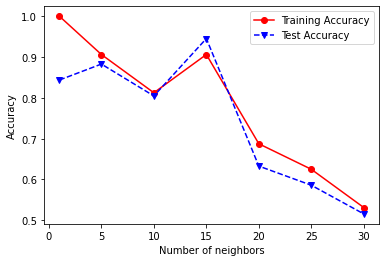

In [149]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')